In [5]:
using Revise, LazySets, Plots, LinearAlgebra

In [7]:
function ff(Z::AbstractZonotope, indices=1:dim(Z))
    length(indices) == dim(Z) || throw(ArgumentError("the number of generator indices is $(length(indices)), " *
                                                     "but it was expected to be $(dim(Z))"))

    p, n = ngens(Z), dim(Z)
    if p == n
        return Z
    elseif p < n
        error("the zonotope order is $(order(Z)) but it should be at least 1")
    end
    
    G = genmat(Z)
    
    for i=1:n
    Gs = [G[:, i] for i in 1:p]
    Gs = sort(Gs, by=norm)
    splice!(Gs, n:p-n+1) # mayor y menor norma
    #splice!(Gs, 1:n) # menor norma
    #splice!(Gs, n+1:p) # mayor norma
    Gs = hcat(Gs...)

    Γ = Gs#G[:, indices]
    □Γ⁻¹Z = box_approximation(linear_map(inv(Γ), Z))
    return linear_map(Γ, □Γ⁻¹Z)
end

ff (generic function with 2 methods)

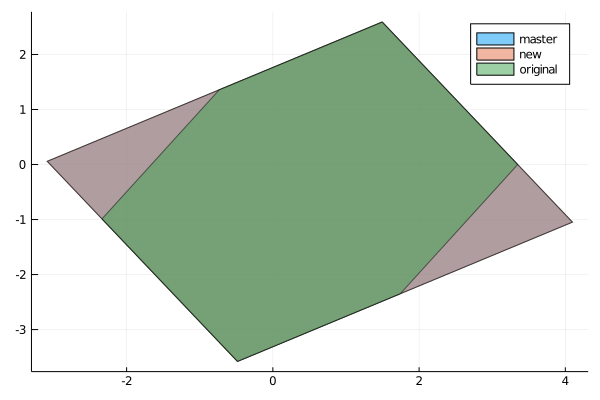

In [47]:
Z = rand(Zonotope, num_generators=3, dim=2)
plot(overapproximate(Z, HParallelotope), label="master")
plot!(ff(Z), label="new")
plot!(Z, label="original")